# **DecisionTree Assignment**

# **Assignment 14(b)**

# ***2.Fraud_check DataSet(Fraud_check.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# **Exploratory Data Analysis**

In [3]:
fraud1=fraud.copy()

In [4]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
fraud.shape

(600, 6)

In [6]:
#checking missing values
(fraud.isna().sum())/len(fraud)*100

Undergrad          0.0
Marital.Status     0.0
Taxable.Income     0.0
City.Population    0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

In [7]:
fraud.isna().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [8]:
#checking duplicates
fraud.duplicated().sum()

0

In [9]:
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [10]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [11]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [12]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [13]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# **Label Encoding**

In [14]:
#now performing Label Encoder for convertion of obj to int

In [15]:
#Undergrad, Marital.Status,Urban are obj based data,so perform encoding on it

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
fraud[['Undergrad','Marital.Status','Urban']]=fraud[['Undergrad','Marital.Status','Urban']].apply(le.fit_transform)

In [18]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [19]:
fraud['tax']='<=30000'
fraud.loc[fraud['Taxable.Income']<=30000,'tax']='Risky'
fraud.loc[fraud['Taxable.Income']>30000,'tax']='Good'

In [20]:
fraud.drop('Taxable.Income',axis=1,inplace=True)

In [21]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


# **Correlation**

In [22]:
#correlation
fraud.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000


# **Visualization**

# **HeatMap**

<Axes: >

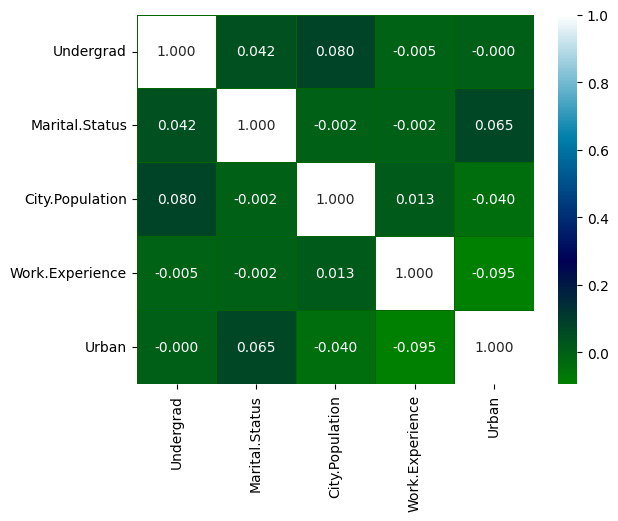

In [23]:
#heatmap
sns.heatmap(fraud.corr(),annot=True,cmap='ocean',fmt='.3f',linecolor='darkgreen',linewidth=0.6)

# **PairPlot**

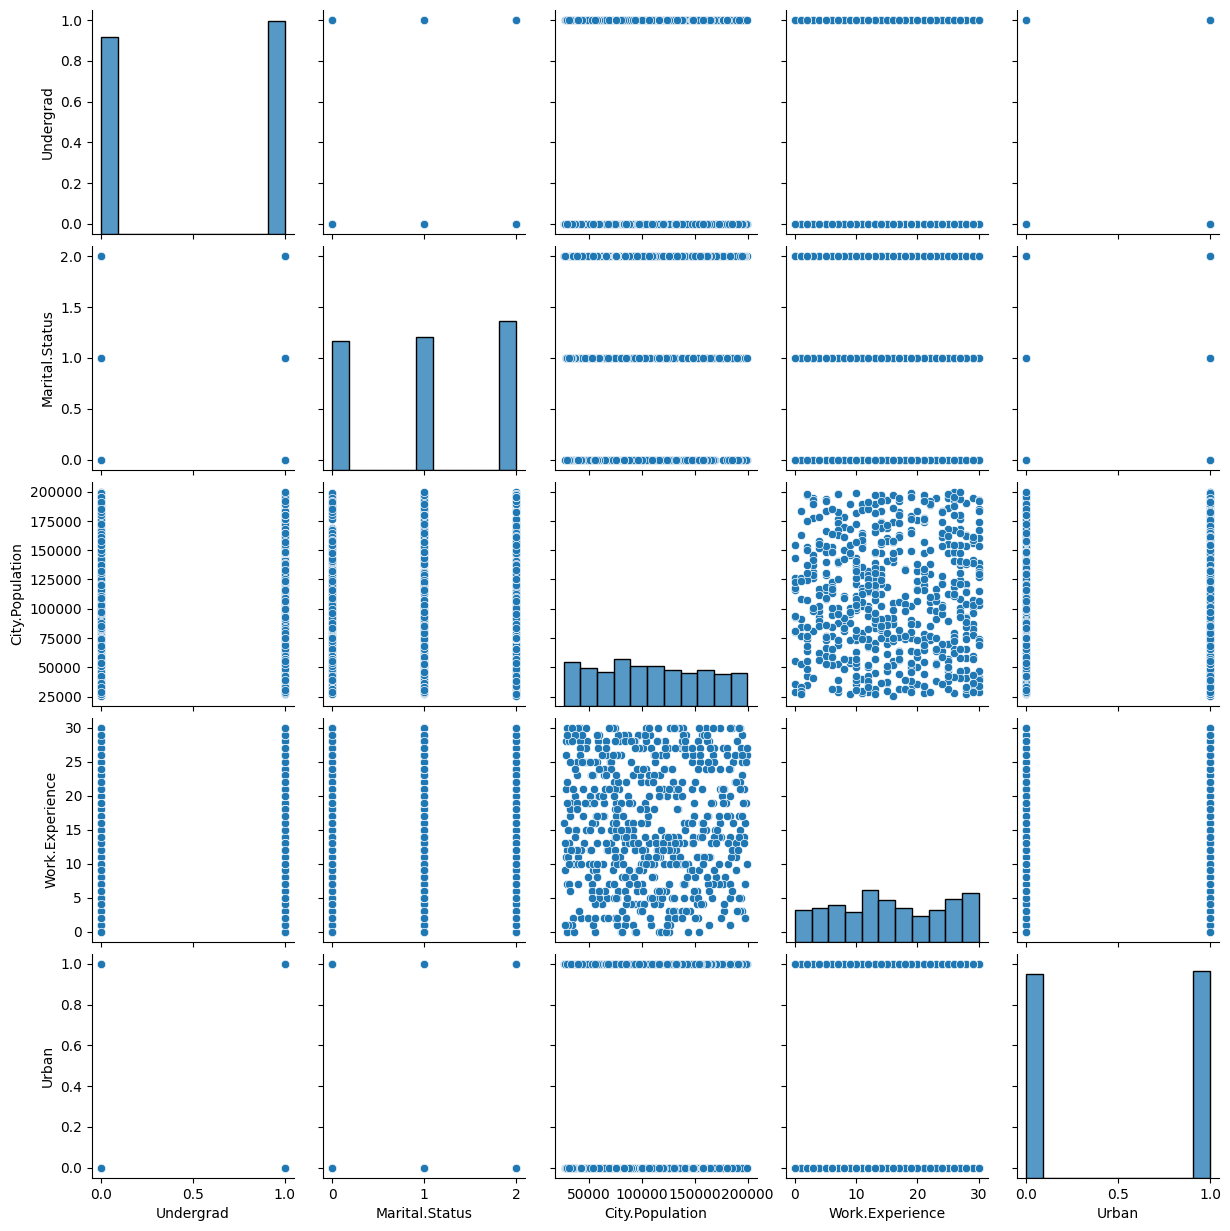

In [24]:
#pairplot
sns.pairplot(fraud)

# **Density Plot**

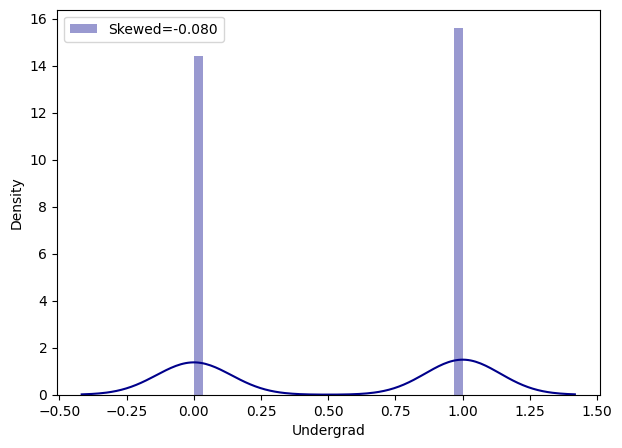

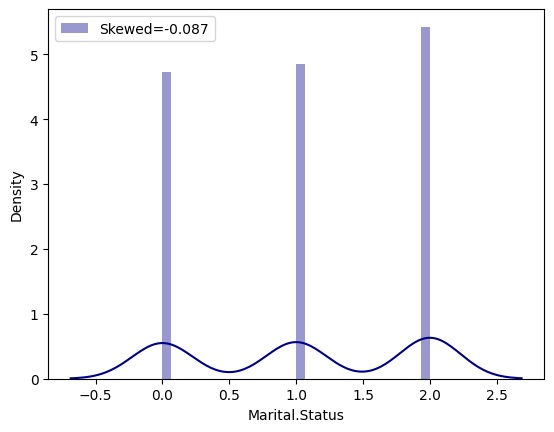

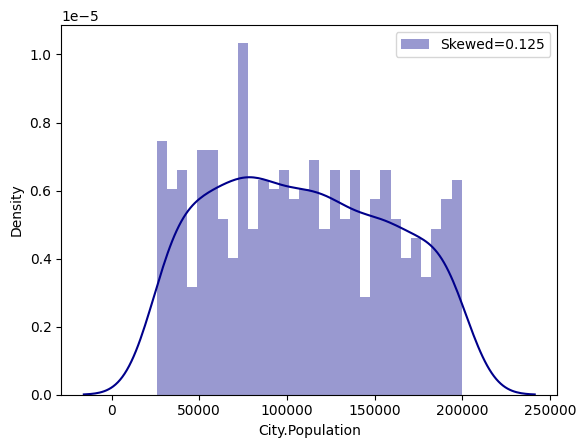

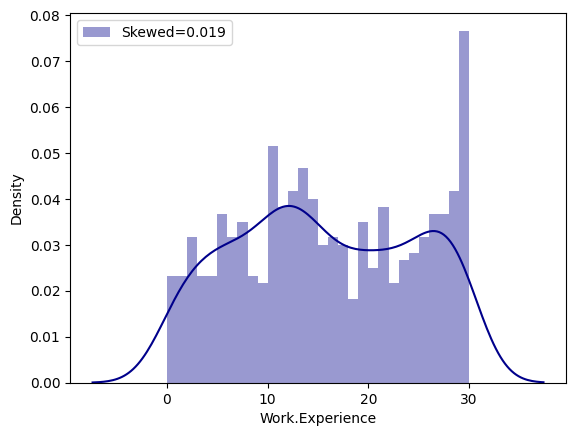

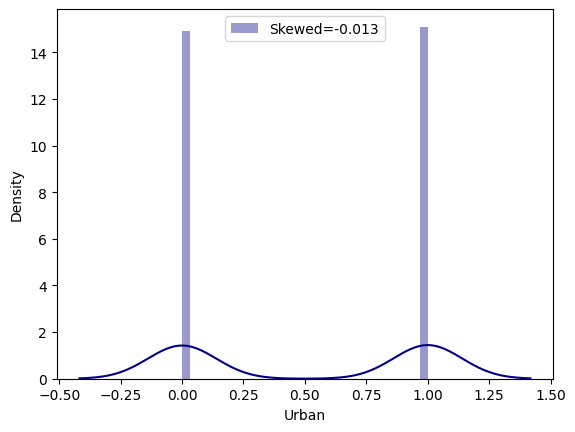

In [25]:
#density plot
plt.figure(figsize=(7,5))
feat=fraud.iloc[:,:-1]
for f in feat:
  skew=fraud[f].skew()
  sns.distplot(fraud[f],label='Skewed=%.3f'%(skew),bins=30,color='darkblue')
  plt.legend()
  plt.show()

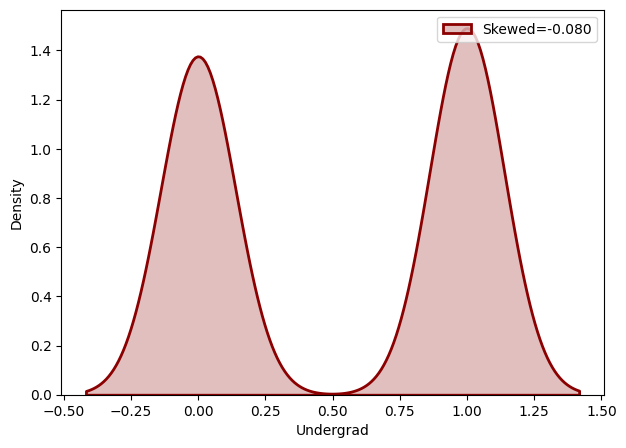

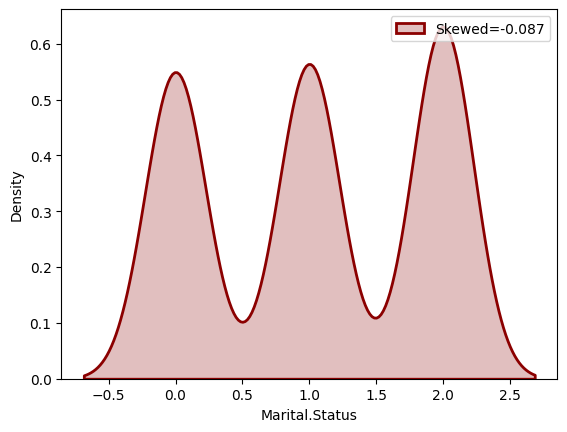

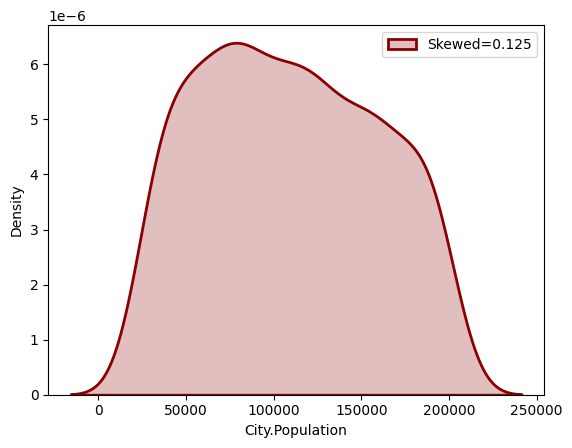

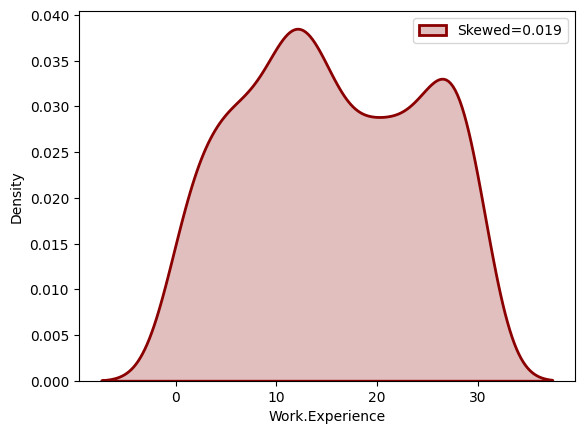

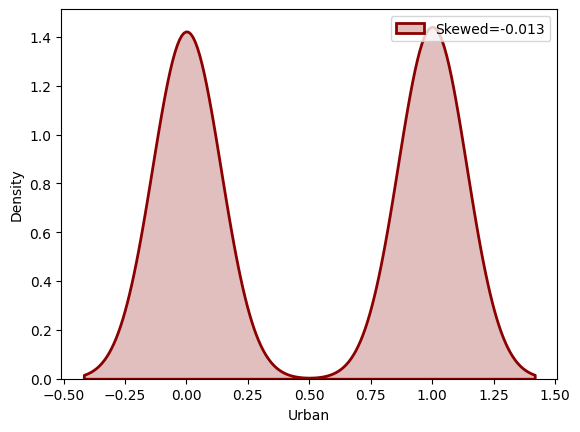

In [26]:
#kde plot
plt.figure(figsize=(7,5))
feat=fraud.iloc[:,:-1]
for f in feat:
  skew=fraud[f].skew()
  sns.kdeplot(fraud[f],label='Skewed=%.3f'%(skew),color='darkred',linewidths=2,shade=True)
  plt.legend()
  plt.show()

# **Histogram**

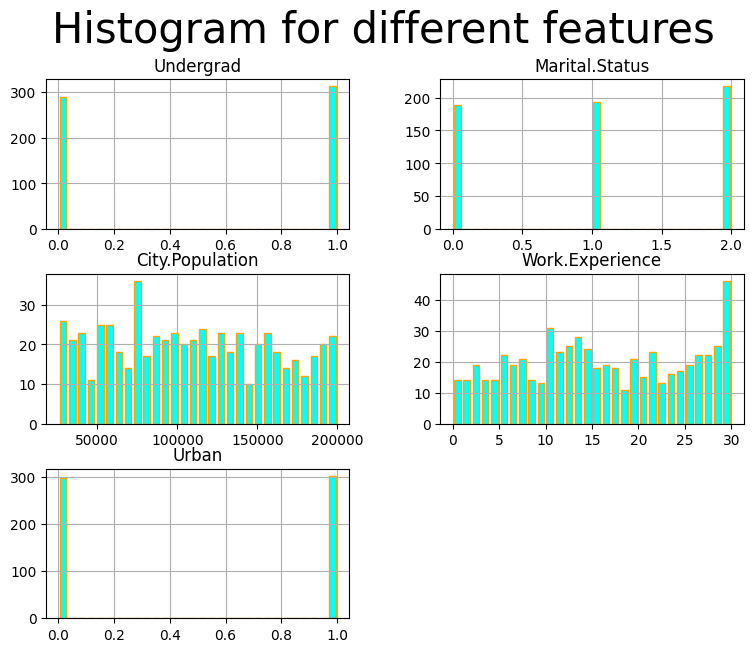

In [27]:
#histogram
fraud.hist(figsize=(9,7),color='cyan',bins=30,edgecolor='orange',rwidth=0.7)
plt.suptitle('Histogram for different features',ha='center',fontsize=30)
plt.show()

<Axes: xlabel='tax', ylabel='Count'>

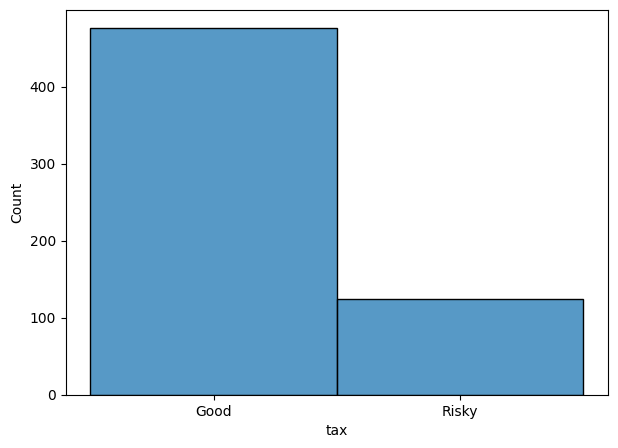

In [28]:
#histplot for tax
plt.figure(figsize=(7,5))
sns.histplot(x='tax',data=fraud)

# **BarPlot**

<Axes: xlabel='tax', ylabel='Work.Experience'>

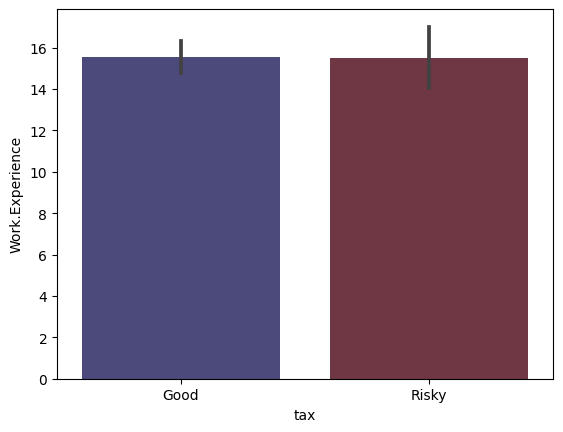

In [29]:
#barplot
sns.barplot(x='tax',y='Work.Experience',data=fraud,palette='icefire')

<Axes: xlabel='tax', ylabel='count'>

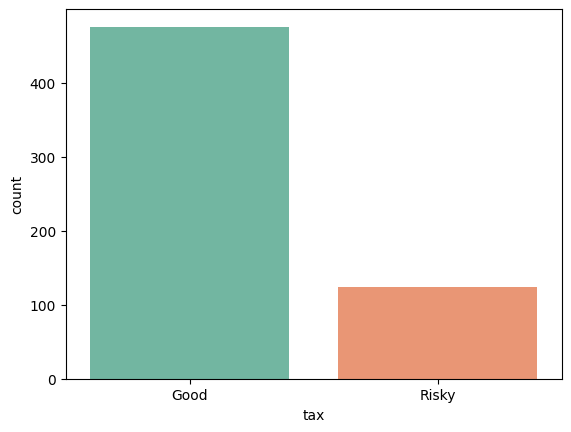

In [30]:
#countplot
sns.countplot(x='tax',data=fraud,palette='Set2')

# **Boxplot**

<Axes: >

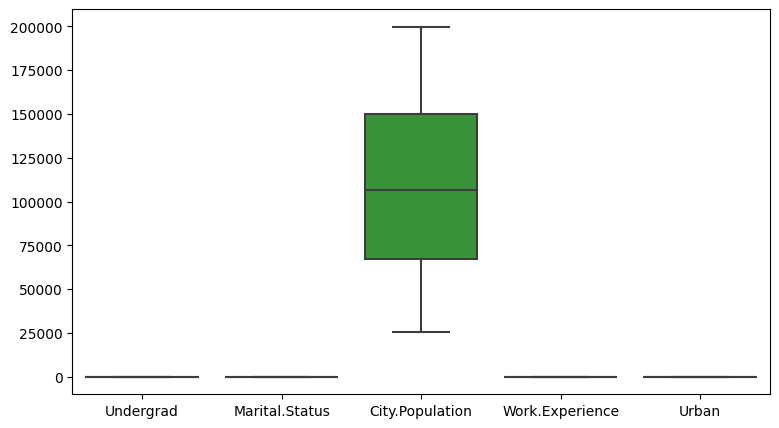

In [31]:
#boxplot
plt.figure(figsize=(9,5))
sns.boxplot(fraud)

**Label Encoding on tax features**

In [32]:
#now as we got tax columns. It is in categorical data so convert it as numeric by onehotencoding

In [33]:
fraud=pd.get_dummies(fraud,columns=['tax'])

In [34]:
fraud.drop('tax_Risky',axis=1,inplace=True)

In [35]:
fraud.rename(columns={'tax_Good':'tax'},inplace=True)

In [36]:
fraud['tax'].value_counts()

1    476
0    124
Name: tax, dtype: int64

In [37]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


# **Spliting into Training and Testing**

In [38]:
#spliting into independent feature(x) and dependent feature(y)

In [39]:
x=fraud.iloc[:,:-1]     #independent feature
y=fraud['tax']        #dependent feature

In [40]:
#spliting into training set and testing set

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=40)

In [43]:
xtrain

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
3,1,2,193264,15,1
149,0,2,49505,25,0
212,1,0,112659,14,0
585,0,2,137622,2,1
524,1,1,164391,27,0
...,...,...,...,...,...
440,0,2,170407,13,1
165,1,1,38463,23,1
7,1,2,131253,3,1
219,1,0,26814,9,0


In [44]:
ytrain

3      1
149    1
212    1
585    1
524    0
      ..
440    1
165    1
7      1
219    0
326    0
Name: tax, Length: 420, dtype: uint8

In [45]:
xtest

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
221,1,2,134135,14,0
390,1,2,57324,17,0
530,1,0,194421,17,1
232,1,1,150349,2,0


In [46]:
ytest

159    1
307    1
253    1
528    1
137    0
      ..
221    1
390    1
530    1
232    0
139    1
Name: tax, Length: 180, dtype: uint8

In [47]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(420, 5)
(420,)
(180, 5)
(180,)


# **Building DecisionTree Model**

# **Decision Model on Gini Criteria**

In [48]:
#model building
#DecisionTreeClassifier
#Based on gini criteria

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
#intialization
model=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [51]:
#fitting
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [52]:
#prediction of the data
ypred=model.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=uint8)

In [53]:
pd.Series(ypred).value_counts()

1    180
dtype: int64

In [54]:
#accuracy model

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.78      1.00      0.88       140

    accuracy                           0.78       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.60      0.78      0.68       180



In [56]:
#accuracy is coming 78%

**Accuracy is 78%**

In [57]:
#accuracy for training data
model.score(xtrain,ytrain)

0.8023809523809524

In [58]:
#accuracy for testing data
model.score(xtest,ytest)

0.7777777777777778

In [59]:
#ploting tree plot

In [60]:
from sklearn import tree

In [61]:
fn=x.columns
cn=['Risky','Good']

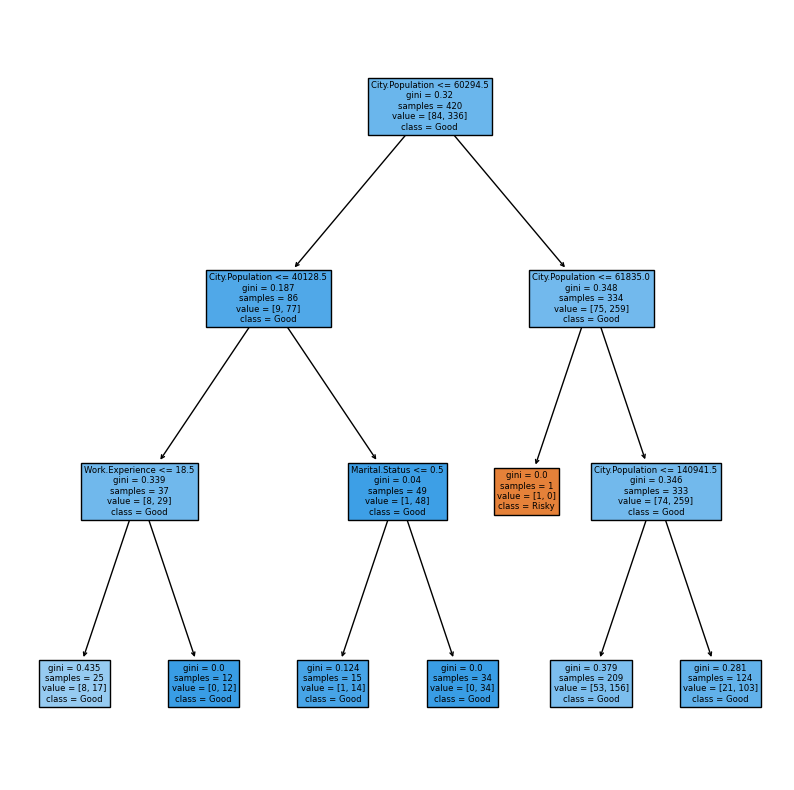

In [62]:
#treeplot
plt.figure(figsize=(10,10))
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [63]:
#Final Accuracy of Gini Criteria is 78%

# **Decision Model on Entropy Criteria**

In [64]:
#model building
#DecisionTreeClassifier
#Based on entropy criteria

In [65]:
#intialization
model_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [66]:
#fitting
model_entropy.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [67]:
#prediction
ypred_entropy=model_entropy.predict(xtest)
ypred_entropy

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=uint8)

In [68]:
pd.Series(ypred_entropy).value_counts()

1    177
0      3
dtype: int64

In [69]:
#accuracy of model

In [70]:
print(classification_report(ytest,ypred_entropy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.77      0.98      0.86       140

    accuracy                           0.76       180
   macro avg       0.39      0.49      0.43       180
weighted avg       0.60      0.76      0.67       180



In [71]:
#accuracy is 76%

**Accuracy for 76%**

In [72]:
#ploting tree plot

In [73]:
fn=x.columns
cn=['Risky','Good']

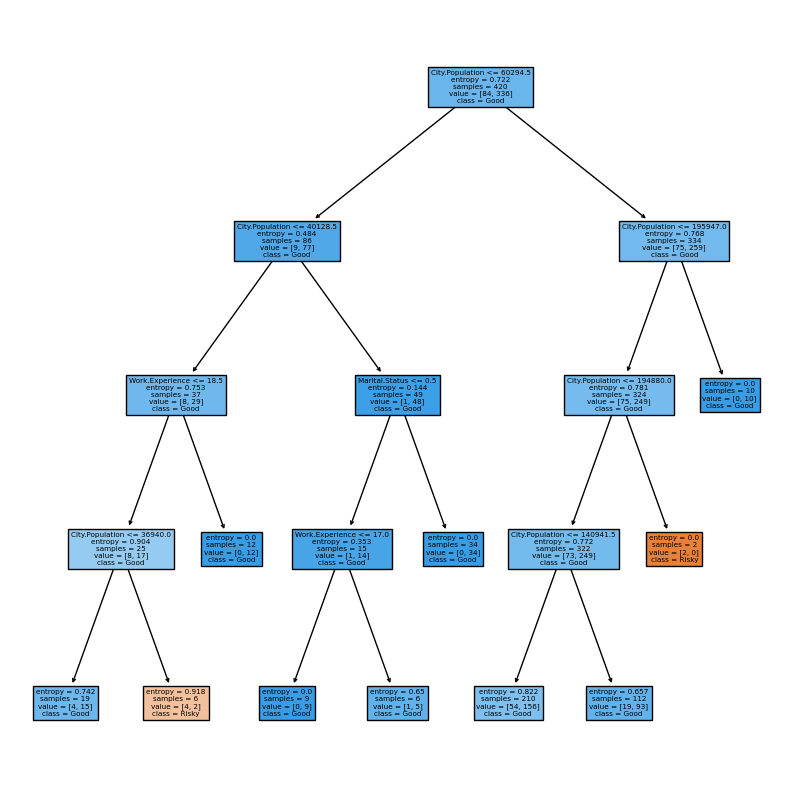

In [74]:
#treeplot
plt.figure(figsize=(10,10))
tree.plot_tree(model_entropy,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [75]:
#Final Accuracy of Entropy Criteria, we got is 76%

# **Conclusion**

In [76]:
#We can conclude that,Best Model we are getting from Decision Tree Model with Gini Criteria ,
#with accuracy of 0.78 i.e 78%

In [77]:
##completed/////

# **Completed**